# Objective
Investigate the sensitivity of the workers to SNR. How high does the minimum SNR need to be for 100% of the spots to be detected?

For a given dataset, take the subset of reference spots with an SNR > n and calculate the fraction of that subset that were detected by the turkers. Build a curve by varying n (SNR_min through SNR_max).

In [10]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = False
img_height = 300
correctness_threshold = 4
clustering_params = ['AffinityPropagation', -350]

# Notes and Takeaways

## Negative slopes

The presence of long, negative slopes in the curve initially surprised me. 

Negative slopes in the curve occur when increasing the minimum SNR of the subset removes detected spots. For example, in the first of the images shown (tissue background, 50 spots, mean SNR = 5):

- min_SNR = 3,   spots_detected/spots_total = 42/50
- min_SNR = 4,   spots_detected/spots_total = 33/35
- min_SNR = 5,   spots_detected/spots_total = 29/30
- min_SNR = 6,   spots_detected/spots_total = 20/21
- min_SNR = 7,   spots_detected/spots_total = 17/18
- min_SNR = 8,   spots_detected/spots_total = 9/10
- min_SNR = 9,   spots_detected/spots_total = 3/4
- min_SNR = 10,  spots_detected/spots_total = 3/3

Each plot in this notebook is preceded by a printout with this data, for reference.

## Min SNR for 100% detection
The minimum SNR for 100% detection hovers between 7 and 12 for the tissue samples. The data from images with cell backgrounds suggest that minimum SNR for 100% detection increases with average SNR of the image. This may have to do with the way the SpotImage tool scales the intensity of the entire image when saving the image (cmap from matplotlib with 'gray' colormapping) as an image file. On an image with high mean SNR, since the whole image is "darkened" in order to achieve the spots' individual stipulated SNR values, workers only detect spots with the highest SNR values relative to the other spots in the image.



| Background | # Spots | Mean SNR | Min SNR for 100% detection |
| --- | --- | --- |--- |
| tissue | 50 | 5 | 10 |
| tissue | 50 | 10 | 8 |
| tissue | 50 | 20 | all spots detected |
| tissue | 100 | 5 | 7 |
| tissue | 100 | 10 | 10 |
| tissue | 100 | 20 | all spots detected |
| tissue | 150 | 5 | 7 |
| tissue | 150 | 10 | 12 |
| tissue | 150 | 20 | all spots detected |
| cells | 50 | 5 | 10 |
| cells | 50 | 10 | 12 |
| cells | 50 | 20 | 19 |
| cells | 100 | 5 | 8 |
| cells | 100 | 10 | 15? |
| cells | 100 | 20 | 26 |
| cells | 150 | 5 | 12 |
| cells | 150 | 10 | 14 |
| cells | 150 | 20 | 21 |

# Plots
Grouped by:
- background
    - number of spots
        - mean SNR

## Background: Tissue

In [2]:
json_filename = 'SynthTests_tissue.json'
gen_date = '20180719'
bg_type = 'tissue'

## Tissue, 50 spots

min_SNR = 3, spots_detected = 42, spots_total = 50
min_SNR = 4, spots_detected = 33, spots_total = 35
min_SNR = 5, spots_detected = 29, spots_total = 30
min_SNR = 6, spots_detected = 20, spots_total = 21
min_SNR = 7, spots_detected = 17, spots_total = 18
min_SNR = 8, spots_detected =  9, spots_total = 10
min_SNR = 9, spots_detected =  3, spots_total =  4
min_SNR =10, spots_detected =  3, spots_total =  3


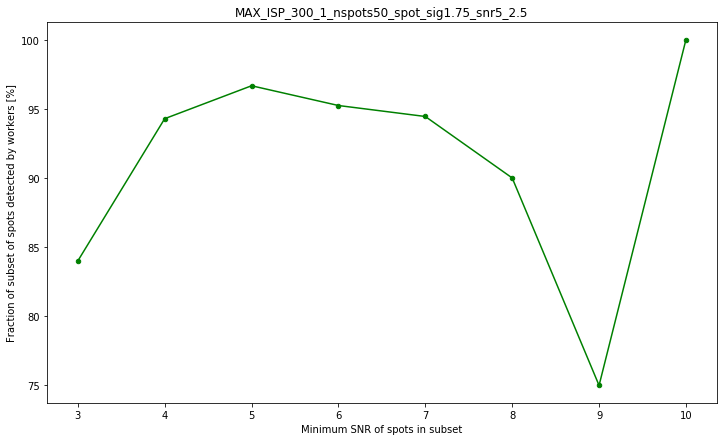

min_SNR = 6, spots_detected = 49, spots_total = 50
min_SNR = 7, spots_detected = 45, spots_total = 46
min_SNR = 8, spots_detected = 40, spots_total = 40
min_SNR = 9, spots_detected = 35, spots_total = 35
min_SNR =10, spots_detected = 33, spots_total = 33
min_SNR =11, spots_detected = 29, spots_total = 29
min_SNR =12, spots_detected = 10, spots_total = 10
min_SNR =13, spots_detected =  5, spots_total =  5
min_SNR =14, spots_detected =  3, spots_total =  3


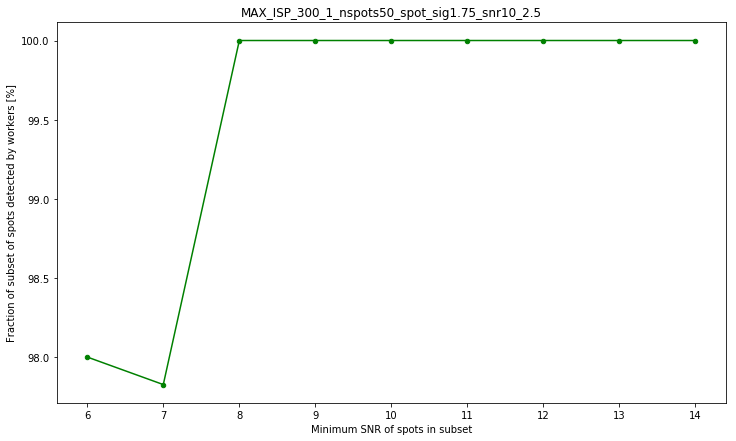

min_SNR =15, spots_detected = 50, spots_total = 50
min_SNR =16, spots_detected = 49, spots_total = 49
min_SNR =17, spots_detected = 45, spots_total = 45
min_SNR =18, spots_detected = 42, spots_total = 42
min_SNR =19, spots_detected = 38, spots_total = 38
min_SNR =20, spots_detected = 29, spots_total = 29
min_SNR =21, spots_detected = 24, spots_total = 24
min_SNR =22, spots_detected = 14, spots_total = 14
min_SNR =23, spots_detected = 11, spots_total = 11
min_SNR =24, spots_detected =  3, spots_total =  3


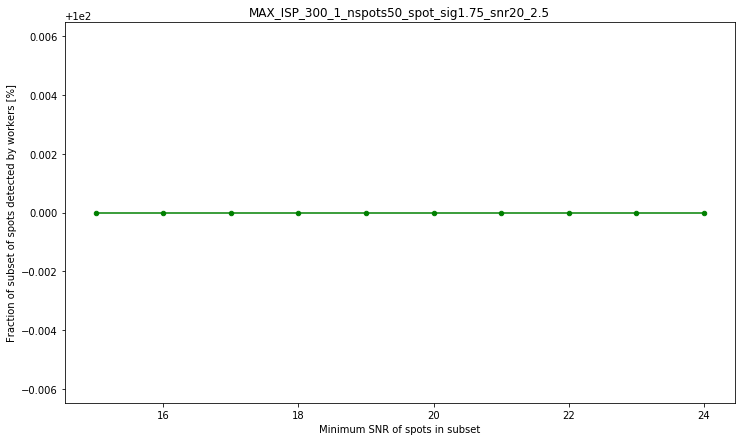

In [3]:
img_names = ['MAX_ISP_300_1_nspots50_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots50_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots50_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    sa.plot_snr_sensitivity(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, plot_title, bigger_window_size)

## Tissue, 100 spots

min_SNR = 3, spots_detected = 86, spots_total =100
min_SNR = 4, spots_detected = 60, spots_total = 62
min_SNR = 5, spots_detected = 45, spots_total = 46
min_SNR = 6, spots_detected = 31, spots_total = 32
min_SNR = 7, spots_detected = 22, spots_total = 22
min_SNR = 8, spots_detected = 10, spots_total = 10
min_SNR = 9, spots_detected =  5, spots_total =  5


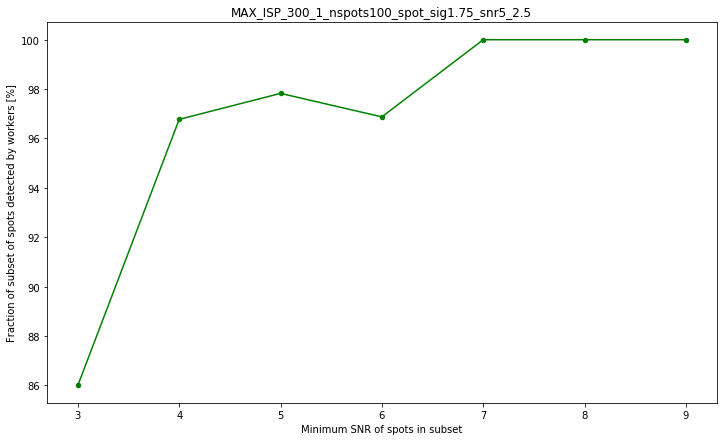

min_SNR = 3, spots_detected = 93, spots_total =100
min_SNR = 4, spots_detected = 93, spots_total = 97
min_SNR = 5, spots_detected = 93, spots_total = 97
min_SNR = 6, spots_detected = 89, spots_total = 92
min_SNR = 7, spots_detected = 82, spots_total = 85
min_SNR = 8, spots_detected = 78, spots_total = 80
min_SNR = 9, spots_detected = 67, spots_total = 69
min_SNR =10, spots_detected = 51, spots_total = 51
min_SNR =11, spots_detected = 36, spots_total = 36
min_SNR =12, spots_detected = 24, spots_total = 24
min_SNR =13, spots_detected = 10, spots_total = 10
min_SNR =14, spots_detected =  6, spots_total =  6
min_SNR =15, spots_detected =  3, spots_total =  3
min_SNR =16, spots_detected =  1, spots_total =  1
min_SNR =17, spots_detected =  1, spots_total =  1


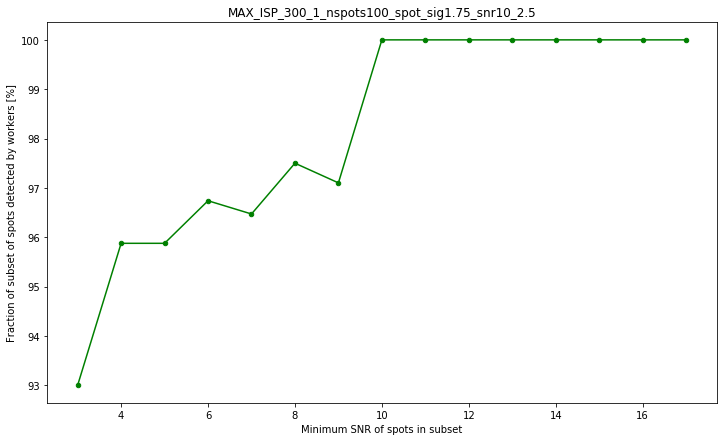

min_SNR =13, spots_detected =100, spots_total =100
min_SNR =14, spots_detected = 99, spots_total = 99
min_SNR =15, spots_detected = 99, spots_total = 99
min_SNR =16, spots_detected = 93, spots_total = 93
min_SNR =17, spots_detected = 87, spots_total = 87
min_SNR =18, spots_detected = 80, spots_total = 80
min_SNR =19, spots_detected = 69, spots_total = 69
min_SNR =20, spots_detected = 57, spots_total = 57
min_SNR =21, spots_detected = 43, spots_total = 43
min_SNR =22, spots_detected = 30, spots_total = 30
min_SNR =23, spots_detected = 18, spots_total = 18
min_SNR =24, spots_detected = 11, spots_total = 11
min_SNR =25, spots_detected =  5, spots_total =  5
min_SNR =26, spots_detected =  2, spots_total =  2


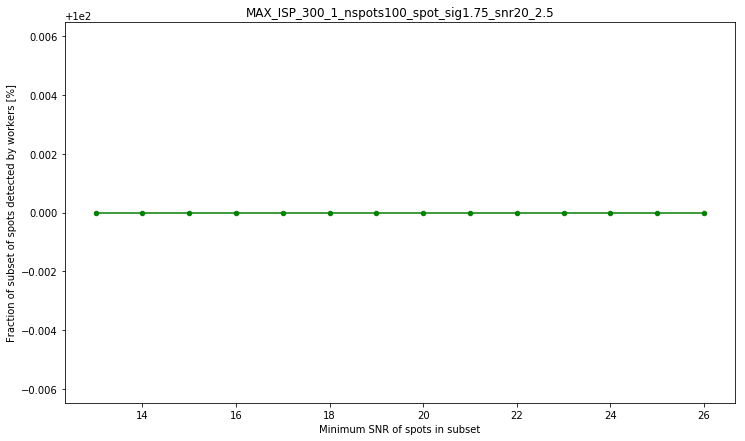

In [4]:
img_names = ['MAX_ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots100_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots100_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    sa.plot_snr_sensitivity(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, plot_title, bigger_window_size)

## Tissue, 150 spots

min_SNR = 3, spots_detected =120, spots_total =150
min_SNR = 4, spots_detected = 85, spots_total = 98
min_SNR = 5, spots_detected = 68, spots_total = 74
min_SNR = 6, spots_detected = 51, spots_total = 53
min_SNR = 7, spots_detected = 28, spots_total = 28
min_SNR = 8, spots_detected = 15, spots_total = 15
min_SNR = 9, spots_detected = 10, spots_total = 10
min_SNR =10, spots_detected =  3, spots_total =  3
min_SNR =11, spots_detected =  3, spots_total =  3


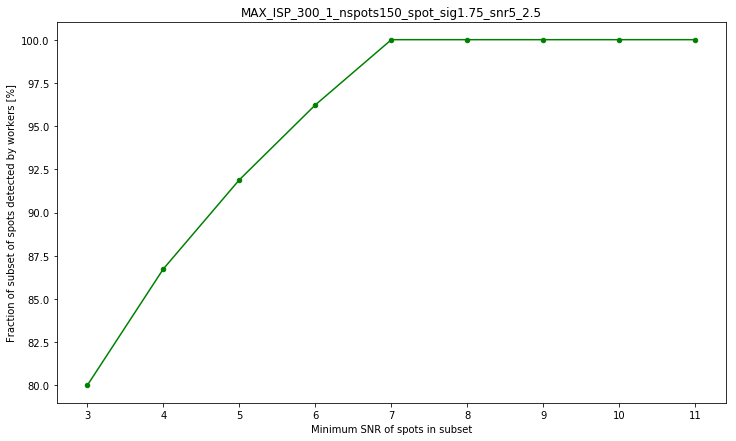

min_SNR = 4, spots_detected =142, spots_total =150
min_SNR = 5, spots_detected =141, spots_total =148
min_SNR = 6, spots_detected =137, spots_total =143
min_SNR = 7, spots_detected =133, spots_total =137
min_SNR = 8, spots_detected =114, spots_total =116
min_SNR = 9, spots_detected =100, spots_total =102
min_SNR =10, spots_detected = 84, spots_total = 85
min_SNR =11, spots_detected = 56, spots_total = 57
min_SNR =12, spots_detected = 40, spots_total = 40
min_SNR =13, spots_detected = 26, spots_total = 26
min_SNR =14, spots_detected = 12, spots_total = 12
min_SNR =15, spots_detected =  6, spots_total =  6
min_SNR =16, spots_detected =  2, spots_total =  2


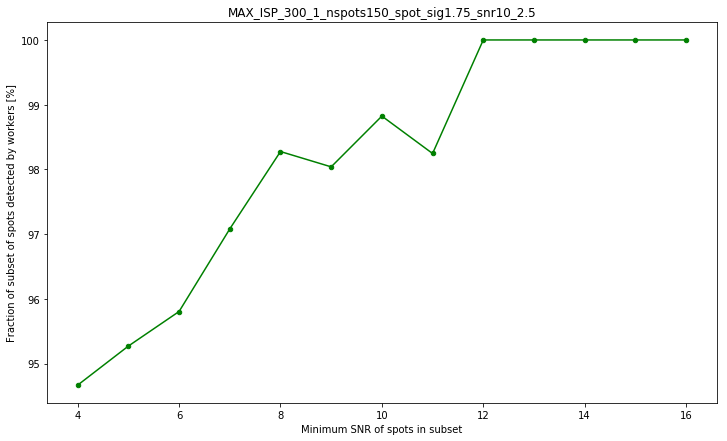

min_SNR =14, spots_detected =150, spots_total =150
min_SNR =15, spots_detected =147, spots_total =147
min_SNR =16, spots_detected =144, spots_total =144
min_SNR =17, spots_detected =135, spots_total =135
min_SNR =18, spots_detected =122, spots_total =122
min_SNR =19, spots_detected = 99, spots_total = 99
min_SNR =20, spots_detected = 81, spots_total = 81
min_SNR =21, spots_detected = 49, spots_total = 49
min_SNR =22, spots_detected = 33, spots_total = 33
min_SNR =23, spots_detected = 21, spots_total = 21
min_SNR =24, spots_detected = 10, spots_total = 10
min_SNR =25, spots_detected =  5, spots_total =  5
min_SNR =26, spots_detected =  2, spots_total =  2


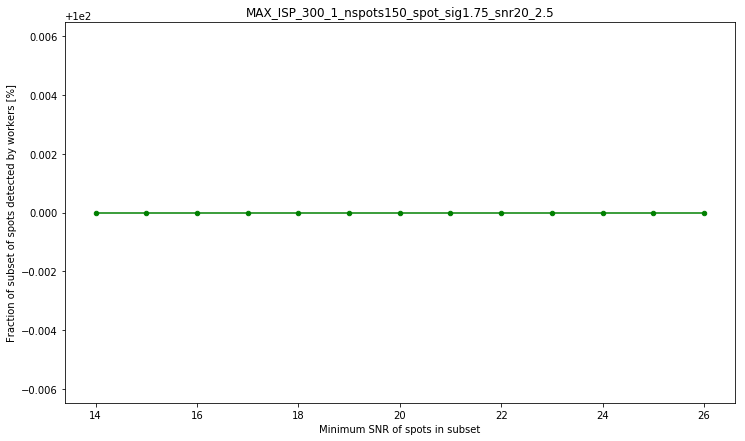

In [5]:
img_names = ['MAX_ISP_300_1_nspots150_spot_sig1.75_snr5_2.5',
             'MAX_ISP_300_1_nspots150_spot_sig1.75_snr10_2.5',
             'MAX_ISP_300_1_nspots150_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    sa.plot_snr_sensitivity(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, plot_title, bigger_window_size)

# Background: Cells

In [6]:
json_filename = 'SynthData_cells.json'
gen_date = '20180719'
bg_type = 'cells'

## Cells, 50 spots

min_SNR = 3, spots_detected = 37, spots_total = 50
min_SNR = 4, spots_detected = 29, spots_total = 35
min_SNR = 5, spots_detected = 26, spots_total = 31
min_SNR = 6, spots_detected = 19, spots_total = 20
min_SNR = 7, spots_detected = 11, spots_total = 12
min_SNR = 8, spots_detected =  7, spots_total =  8
min_SNR = 9, spots_detected =  3, spots_total =  4
min_SNR =10, spots_detected =  2, spots_total =  2
min_SNR =11, spots_detected =  2, spots_total =  2
min_SNR =12, spots_detected =  1, spots_total =  1
min_SNR =13, spots_detected =  1, spots_total =  1


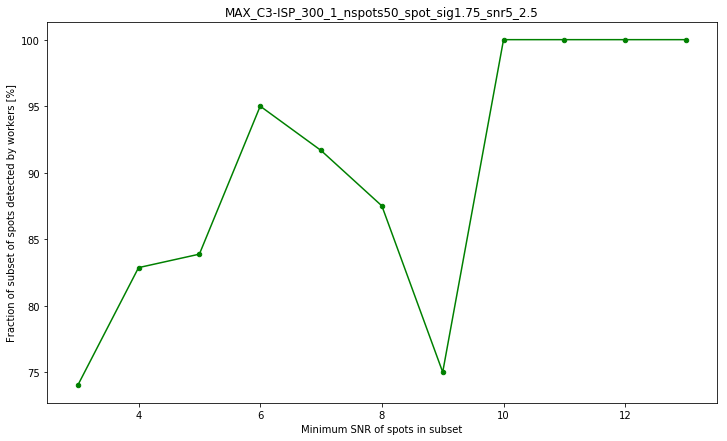

min_SNR = 4, spots_detected = 44, spots_total = 50
min_SNR = 5, spots_detected = 43, spots_total = 48
min_SNR = 6, spots_detected = 40, spots_total = 45
min_SNR = 7, spots_detected = 38, spots_total = 42
min_SNR = 8, spots_detected = 30, spots_total = 34
min_SNR = 9, spots_detected = 27, spots_total = 31
min_SNR =10, spots_detected = 24, spots_total = 26
min_SNR =11, spots_detected = 21, spots_total = 22
min_SNR =12, spots_detected = 17, spots_total = 17
min_SNR =13, spots_detected =  7, spots_total =  7
min_SNR =14, spots_detected =  5, spots_total =  5
min_SNR =15, spots_detected =  1, spots_total =  1


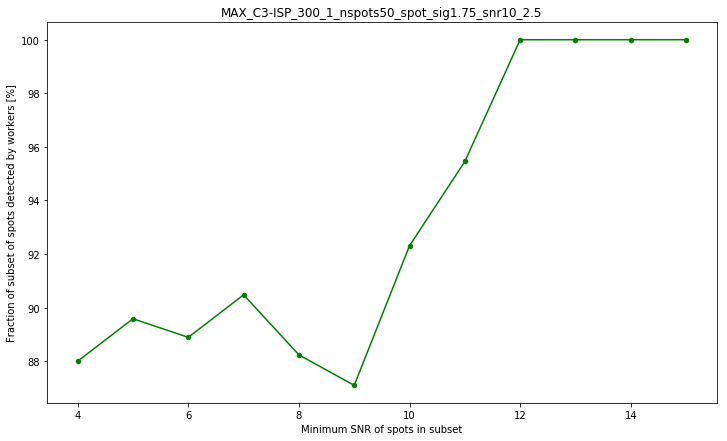

min_SNR =15, spots_detected = 47, spots_total = 50
min_SNR =16, spots_detected = 43, spots_total = 46
min_SNR =17, spots_detected = 41, spots_total = 43
min_SNR =18, spots_detected = 34, spots_total = 35
min_SNR =19, spots_detected = 32, spots_total = 32
min_SNR =20, spots_detected = 25, spots_total = 25
min_SNR =21, spots_detected = 20, spots_total = 20
min_SNR =22, spots_detected = 12, spots_total = 12
min_SNR =23, spots_detected =  6, spots_total =  6
min_SNR =24, spots_detected =  3, spots_total =  3
min_SNR =25, spots_detected =  2, spots_total =  2
min_SNR =26, spots_detected =  2, spots_total =  2
min_SNR =27, spots_detected =  1, spots_total =  1


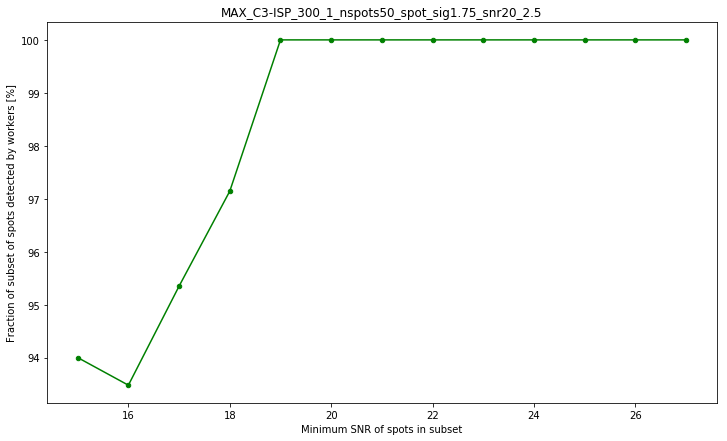

In [7]:
img_names = ['MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots50_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    sa.plot_snr_sensitivity(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, plot_title, bigger_window_size)

## Cells, 100 spots

min_SNR = 3, spots_detected = 67, spots_total =100
min_SNR = 4, spots_detected = 51, spots_total = 64
min_SNR = 5, spots_detected = 38, spots_total = 46
min_SNR = 6, spots_detected = 30, spots_total = 32
min_SNR = 7, spots_detected = 21, spots_total = 22
min_SNR = 8, spots_detected = 10, spots_total = 10
min_SNR = 9, spots_detected =  6, spots_total =  6


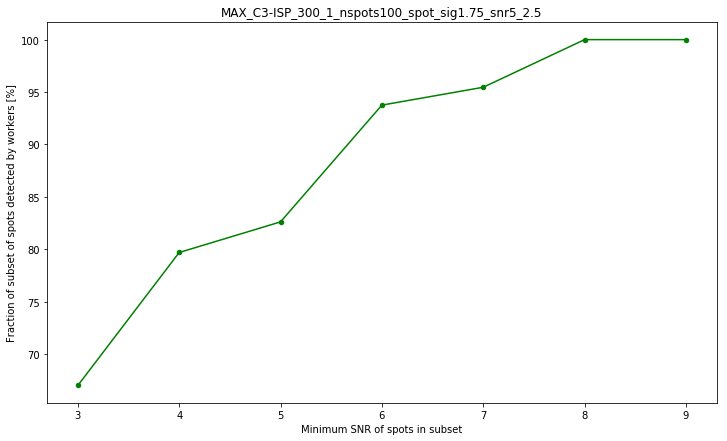

min_SNR = 4, spots_detected = 91, spots_total =100
min_SNR = 5, spots_detected = 88, spots_total = 96
min_SNR = 6, spots_detected = 87, spots_total = 94
min_SNR = 7, spots_detected = 80, spots_total = 87
min_SNR = 8, spots_detected = 71, spots_total = 77
min_SNR = 9, spots_detected = 54, spots_total = 60
min_SNR =10, spots_detected = 43, spots_total = 48
min_SNR =11, spots_detected = 27, spots_total = 31
min_SNR =12, spots_detected = 17, spots_total = 21
min_SNR =13, spots_detected =  8, spots_total = 11
min_SNR =14, spots_detected =  3, spots_total =  4
min_SNR =15, spots_detected =  1, spots_total =  1


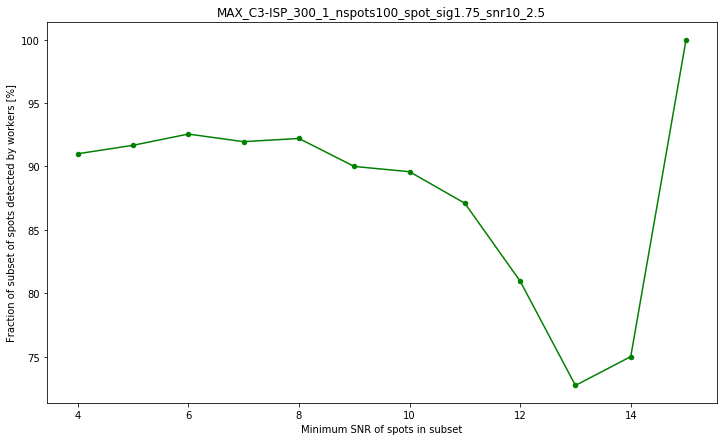

min_SNR =14, spots_detected = 96, spots_total =100
min_SNR =15, spots_detected = 95, spots_total = 99
min_SNR =16, spots_detected = 91, spots_total = 95
min_SNR =17, spots_detected = 80, spots_total = 84
min_SNR =18, spots_detected = 71, spots_total = 74
min_SNR =19, spots_detected = 59, spots_total = 61
min_SNR =20, spots_detected = 34, spots_total = 35
min_SNR =21, spots_detected = 23, spots_total = 24
min_SNR =22, spots_detected = 11, spots_total = 12
min_SNR =23, spots_detected =  6, spots_total =  7
min_SNR =24, spots_detected =  3, spots_total =  4
min_SNR =25, spots_detected =  2, spots_total =  3
min_SNR =26, spots_detected =  1, spots_total =  1


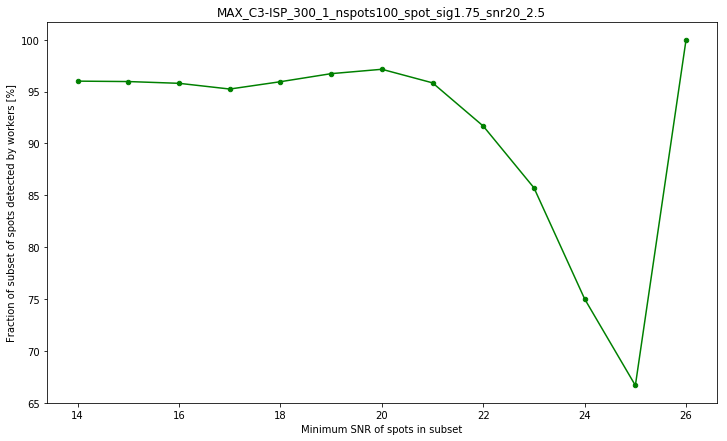

In [8]:
img_names = ['MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots100_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    sa.plot_snr_sensitivity(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, plot_title, bigger_window_size)

## Cells, 150 spots

min_SNR = 3, spots_detected =105, spots_total =150
min_SNR = 4, spots_detected = 79, spots_total = 94
min_SNR = 5, spots_detected = 68, spots_total = 78
min_SNR = 6, spots_detected = 52, spots_total = 57
min_SNR = 7, spots_detected = 33, spots_total = 36
min_SNR = 8, spots_detected = 16, spots_total = 19
min_SNR = 9, spots_detected =  6, spots_total =  8
min_SNR =10, spots_detected =  1, spots_total =  2
min_SNR =11, spots_detected =  1, spots_total =  2
min_SNR =12, spots_detected =  1, spots_total =  1


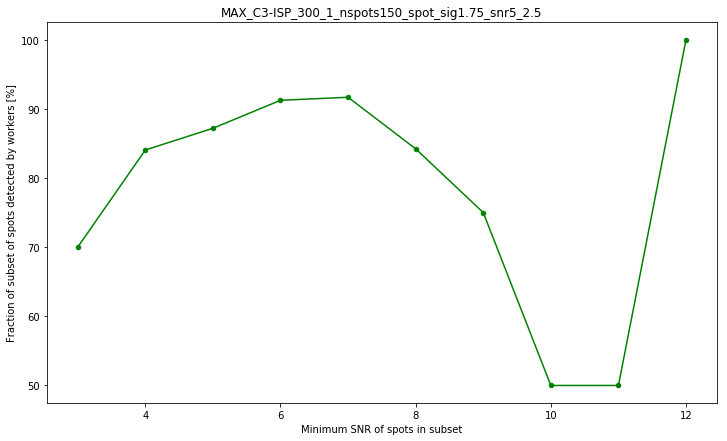

min_SNR = 3, spots_detected =136, spots_total =150
min_SNR = 4, spots_detected =135, spots_total =148
min_SNR = 5, spots_detected =134, spots_total =147
min_SNR = 6, spots_detected =132, spots_total =145
min_SNR = 7, spots_detected =128, spots_total =140
min_SNR = 8, spots_detected =117, spots_total =127
min_SNR = 9, spots_detected =104, spots_total =111
min_SNR =10, spots_detected = 82, spots_total = 87
min_SNR =11, spots_detected = 61, spots_total = 65
min_SNR =12, spots_detected = 41, spots_total = 43
min_SNR =13, spots_detected = 25, spots_total = 26
min_SNR =14, spots_detected = 13, spots_total = 13
min_SNR =15, spots_detected =  5, spots_total =  5
min_SNR =16, spots_detected =  2, spots_total =  2
min_SNR =17, spots_detected =  1, spots_total =  1
min_SNR =18, spots_detected =  1, spots_total =  1


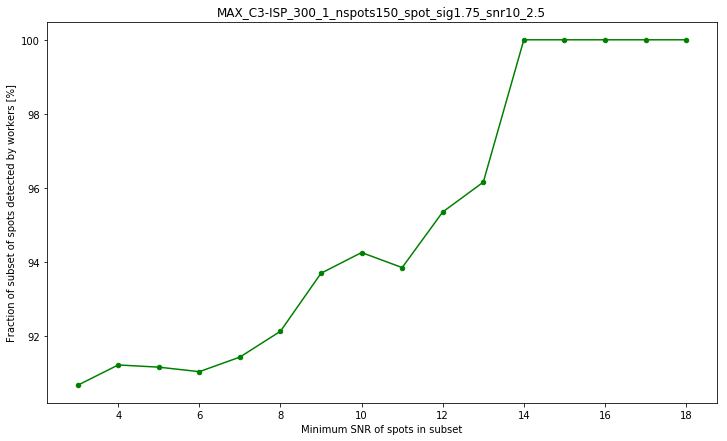

min_SNR =14, spots_detected =143, spots_total =150
min_SNR =15, spots_detected =140, spots_total =147
min_SNR =16, spots_detected =134, spots_total =141
min_SNR =17, spots_detected =129, spots_total =134
min_SNR =18, spots_detected =113, spots_total =117
min_SNR =19, spots_detected = 94, spots_total = 96
min_SNR =20, spots_detected = 68, spots_total = 70
min_SNR =21, spots_detected = 46, spots_total = 46
min_SNR =22, spots_detected = 27, spots_total = 27
min_SNR =23, spots_detected = 13, spots_total = 13
min_SNR =24, spots_detected =  7, spots_total =  7
min_SNR =25, spots_detected =  3, spots_total =  3
min_SNR =26, spots_detected =  1, spots_total =  1


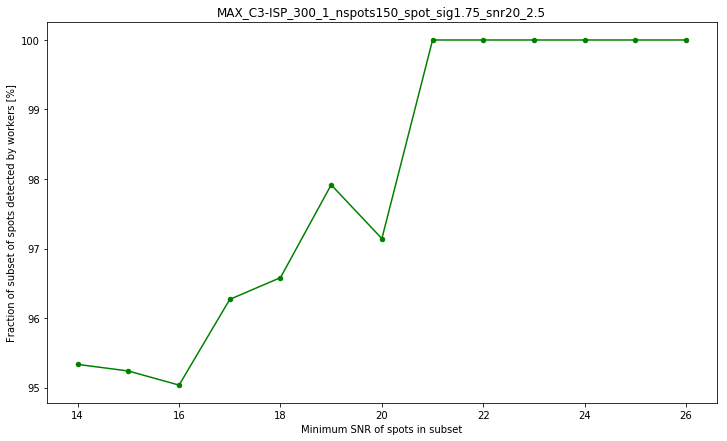

In [9]:
img_names = ['MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr5_2.5',
             'MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr10_2.5',
             'MAX_C3-ISP_300_1_nspots150_spot_sig1.75_snr20_2.5']

for img_name in img_names:
    img_filename = img_name+'spot_img.png'
    img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
    csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
    json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename
    ba = QuantiusAnnotation(json_filepath)
    sa = SpotAnnotationAnalysis(ba)
    anno_all = ba.df()
    anno_one_snr = ba.slice_by_image(anno_all, img_filename)
    plot_title = img_name
    sa.plot_snr_sensitivity(anno_one_snr, clustering_params, csv_filepath, img_height, img_filename, correctness_threshold, plot_title, bigger_window_size)